In [22]:
img_path = "../data/test30_imgs/original-1-20.JPG"

## Edge Detection (Canny)
https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

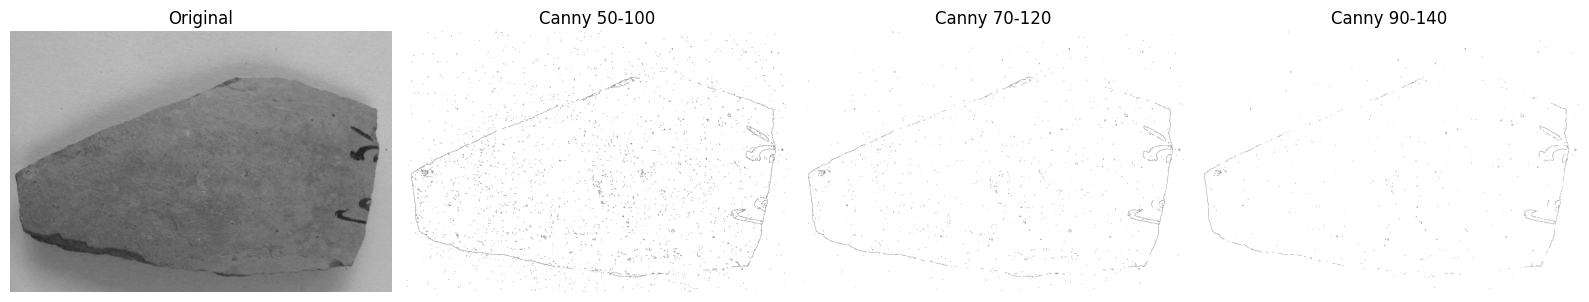

In [29]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import math

# https://pyimagesearch.com/2015/04/06/zero-parameter-automatic-canny-edge-detection-with-python-and-opencv/
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv.Canny(image, lower, upper)
	# return the edged image
	return edged

def plot_canny_thresholds(img_path, canny_pairs):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    assert img is not None, "File could not be read"
    images = [img]
    titles = ["Original"]

    # generate edges for each threshold pair
    for low, high in canny_pairs:
        edges = cv.Canny(img, low, high)
        edges = cv.bitwise_not(edges) #white bg
        images.append(edges)
        titles.append(f"Canny {low}-{high}")
    n_imgs = len(images)
    cols = min(4, n_imgs)
    rows = math.ceil(n_imgs / cols)

    # plot
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axes = axes.flatten() if n_imgs > 1 else [axes]

    for ax, im, title in zip(axes, images, titles):
        ax.imshow(im, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

canny_pairs = [
    (50, 100),
    (70, 120),
    (90, 140),
]

img_path = "../data/test30_imgs/original-1-2.JPG"
plot_canny_thresholds(img_path, canny_pairs)

## Kmeans Segmentation (with added HSV)

In [21]:
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

def display_hsv_channels(image_path, output_file=None):
    image = io.imread(image_path)
    hsv_image = color.rgb2hsv(image)
    h, s, v = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]
    
    # channel combinations
    hs = np.stack((h, s, np.zeros_like(h)), axis=-1)  # H & S (zero for V)
    sv = np.stack((np.zeros_like(s), s, v), axis=-1)  # S & V (zero for H)
    vh = np.stack((h, np.zeros_like(v), v), axis=-1)  # V & H (zero for S)
    
    # Plot images
    fig, axes = plt.subplots(1, 5, figsize=(10, 3))
    
    axes[0].imshow(image)
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    axes[4].imshow(hsv_image)
    axes[4].set_title("HSV Image")
    axes[4].axis("off")
    
    axes[1].imshow(h, cmap='hsv')
    axes[1].set_title("Hue Channel")
    axes[1].axis("off")
    
    axes[2].imshow(s)
    axes[2].set_title("Saturation Channel")
    axes[2].axis("off")
    
    axes[3].imshow(v)
    axes[3].set_title("Value Channel")
    axes[3].axis("off")
    
    plt.tight_layout()
    if output_file:
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()
    plt.close()

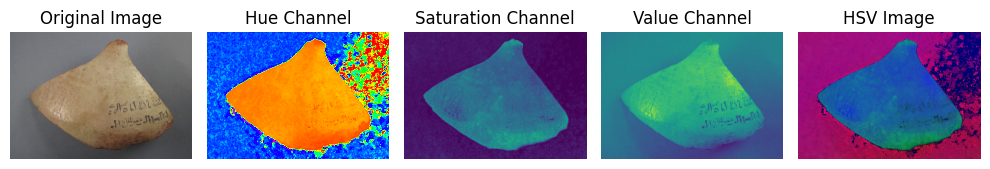

In [23]:
# img_path = "../data/original-1-7.JPG"
# image_path = "original-1-12.JPG"
display_hsv_channels(img_path)


In [8]:
import os
import cv2
import matplotlib.pyplot as plt

def process_saturation_folder_cv2(folder_path, output_folder=None):
    if output_folder and not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            saturation = hsv_image[:, :, 1]
            
            # Compute Otsu threshold
            otsu_thresh, binary = cv2.threshold(saturation, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            # manual lower threshold by 10
            manual_thresh = max(0, otsu_thresh - 10) 
            _, binary = cv2.threshold(saturation, manual_thresh, 255, cv2.THRESH_BINARY)
            
            # Plot results
            fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
            ax = axes.ravel()
            
            ax[0].imshow(saturation, cmap='gray')
            ax[0].set_title('Saturation Channel')
            ax[0].axis('off')
            
            ax[1].hist(saturation.ravel(), bins=256)
            ax[1].axvline(_, color='r', linestyle='--')  # Threshold value
            ax[1].set_title('Histogram')
            
            ax[2].imshow(binary, cmap='gray')
            ax[2].set_title('Thresholded')
            ax[2].axis('off')
            
            plt.tight_layout()
            
            # Save figure if output folder specified
            if output_folder:
                save_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}_saturation.png")
                plt.savefig(save_path, dpi=150)
                plt.close()
            else:
                plt.show()

process_saturation_folder_cv2('../data/test30_imgs')#, output_folder="../results/sat_segment")


In [ ]:
import os
from skimage import io, color
import numpy as np

folder_path = "../data"
output_folder = "../results/hsv_tests"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.lower().endswith(".jpg"):  # Check if it's a JPG file
        file_path = os.path.join(folder_path, filename)
        
        try:
            # processing: Convert to hsv
            save_path = os.path.join(output_folder, f"processed_{filename}")
            display_hsv_channels(file_path, save_path)

            print(f"Processed and saved: {save_path}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")


Processed and saved: ../results/hsv_tests/processed_original-1-17.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-16.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-14.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-15.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-29.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-11.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-10.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-12.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-13.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-3.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-2.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-5.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-4.JPG
Processed and saved: ../results/hsv_tests/processed_original-1-6.JPG
Processed and saved: ../r

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import mode

def kmeans_segment(img, features, k=2, r=10):
    h, w = img.shape[:2]

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    labels = kmeans.labels_.reshape(h, w)

    # Find majority label in rxr center
    cx, cy = w // 2, h // 2
    roi = labels[cy - r:cy + r, cx - r:cx + r]

    m = mode(roi.flatten(), keepdims=False).mode
    majority_label = int(m)

    binary = np.uint8(labels == majority_label) * 255
    return labels, binary, majority_label


def segment_hsv(image_path, select_hsv="HSV", output_file=None):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # --- Pre-filtering ---
    img_blur = cv2.GaussianBlur(img, (5, 5), 0)
    img_blur = cv2.medianBlur(img_blur, 5)

    h, w = img_blur.shape[:2]
    rgb = img_blur.reshape(-1, 3)

    # HSV feature set
    hsv_img = cv2.cvtColor(img_blur, cv2.COLOR_RGB2HSV)
    hsv = hsv_img.reshape(-1, 3)
    
    if select_hsv == "H":
        hsv_selected = hsv[:, [0]]
    elif select_hsv == "S":
        hsv_selected = hsv[:, [1]]
    elif select_hsv == "V":
        hsv_selected = hsv[:, [2]]
    else:
        hsv_selected = hsv

    # KMEANS #1: RGB only
    labels_rgb, binary_rgb, maj_rgb = kmeans_segment(
        img_blur, rgb, k=2
    )

    # KMEANS #2: RGB + HSV 
    rgb_hsv = np.column_stack((rgb, hsv_selected))

    labels_rgb_hsv, binary_rgb_hsv, maj_rgb_hsv = kmeans_segment(
        img_blur, rgb_hsv, k=2
    )

    # plot
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))

    axes[0].set_title("Original")
    axes[0].imshow(img_blur)
    axes[0].axis("off")

    axes[1].set_title("KMeans (RGB only)")
    axes[1].imshow(labels_rgb, cmap="nipy_spectral")
    axes[1].axis("off")

    axes[2].set_title("KMeans (RGB + %s)" % select_hsv)
    axes[2].imshow(labels_rgb_hsv, cmap="nipy_spectral")
    axes[2].axis("off")

    plt.tight_layout()

    # save if file name
    if output_file:
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
    else:
        plt.show()
    plt.close()


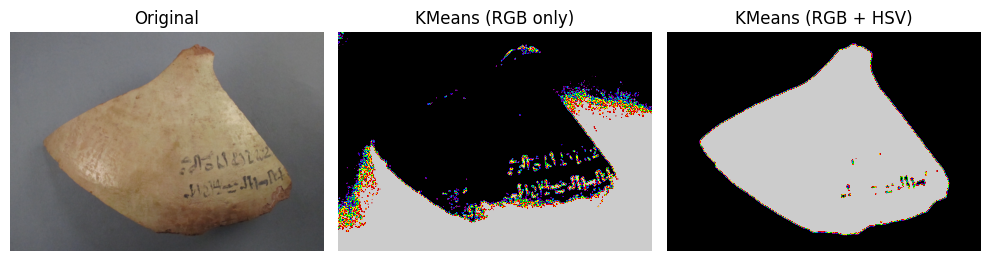

In [ ]:

segment_hsv(img_path, "HSV")

In [27]:
import os
from skimage import io, color
import numpy as np

folder_path = "../data/test30_imgs"
output_folder = "../results/hsv_segment"
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(folder_path):
    if filename.lower().endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)
        try:
            # processing: Convert to hsv
            save_path = os.path.join(output_folder, f"processed_{filename}")
            segment_hsv(file_path, "HSV", save_path)
            # segment_hsv(file_path)
            print(f"Processed and saved: {save_path}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")


Processed and saved: ../results/hsv_segment/processed_original-1-17.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-16.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-14.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-15.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-29.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-11.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-10.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-12.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-13.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-3.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-2.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-5.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-4.JPG
Processed and saved: ../results/hsv_segment/processed_original-1-6.J

In [38]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

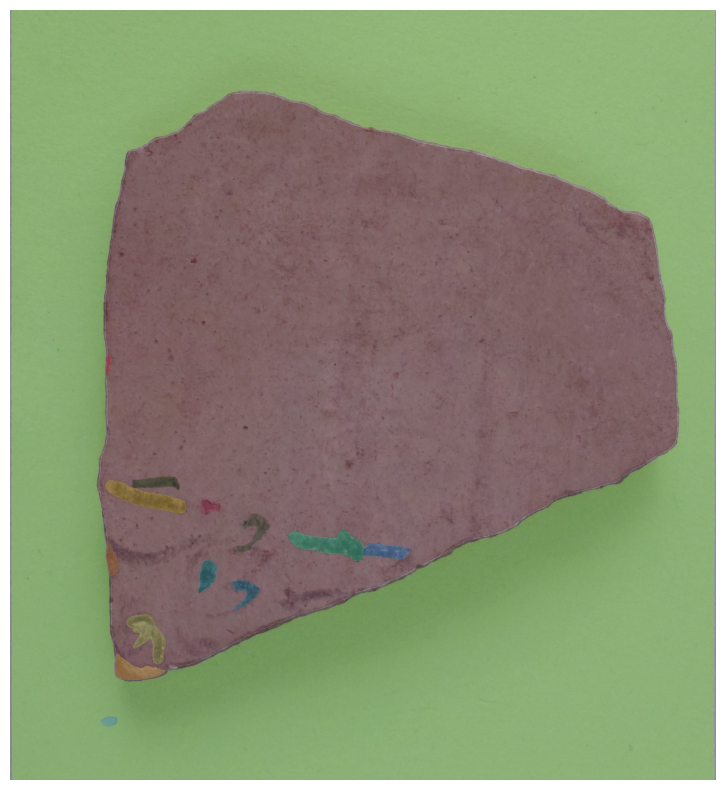

In [ ]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_h"](checkpoint="../sam_vit_h_4b8939.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
masks = mask_generator.generate(image)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [ ]:
mask_generator_2 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=5,
    pred_iou_thresh=0.86,
    stability_score_thresh=0.92,
    crop_n_layers=1,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=500,  # Requires open-cv to run post-processing
)
masks2 = mask_generator_2.generate(image)

plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()